## Does money make people happy?

We can  download the Better Life Index data from the OECD’s website and World Bank stats about gross domestic product (GDP) per capita.

In [3]:
import pandas as pd
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")


In [4]:
lifesat.describe() # only 27 countries

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [5]:
lifesat.head(n=10)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


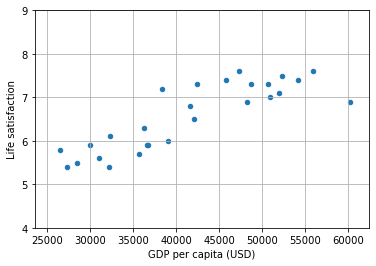

In [6]:
import matplotlib.pyplot as plt
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()


Using a linear regression model

In [7]:

from sklearn.linear_model import LinearRegression
import numpy as np
# Select a linear model
model = LinearRegression()
# Train the model
model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[37_655.2]] # Cyprus' GDP per capita in 2020
print(model.predict(X_new))
 # output: [[6.30165767]]
print(model.intercept_)
print(model.coef_)




[3.74904943]
[[6.77889969e-05]]


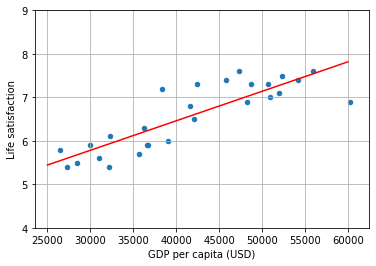

In [8]:
slope = model.coef_[0]
intercept = model.intercept_
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])


# Plot the linear equation
x_line = np.linspace(25000, 60000, 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red',)
plt.show()


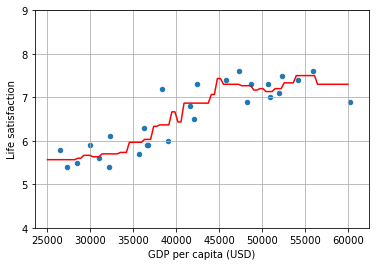

In [14]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X, y)
model.predict(X_new)
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])


# Plot the linear equation
x_line = np.linspace(25000, 60000, 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red',)
plt.show()

You will see that the prediction line is not linear
What if we change the neighbour value?

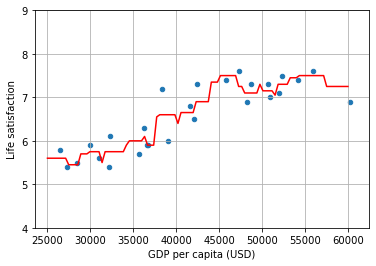

In [15]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X, y)
model.predict(X_new)
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])


# Plot the linear equation
x_line = np.linspace(25000, 60000, 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red',)
plt.show()

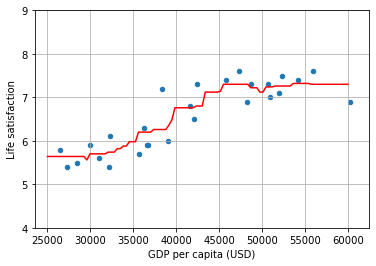

In [20]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X, y)
model.predict(X_new)
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])


# Plot the linear equation
x_line = np.linspace(25000, 60000, 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red',)
plt.show()

array([[6.33333333]])